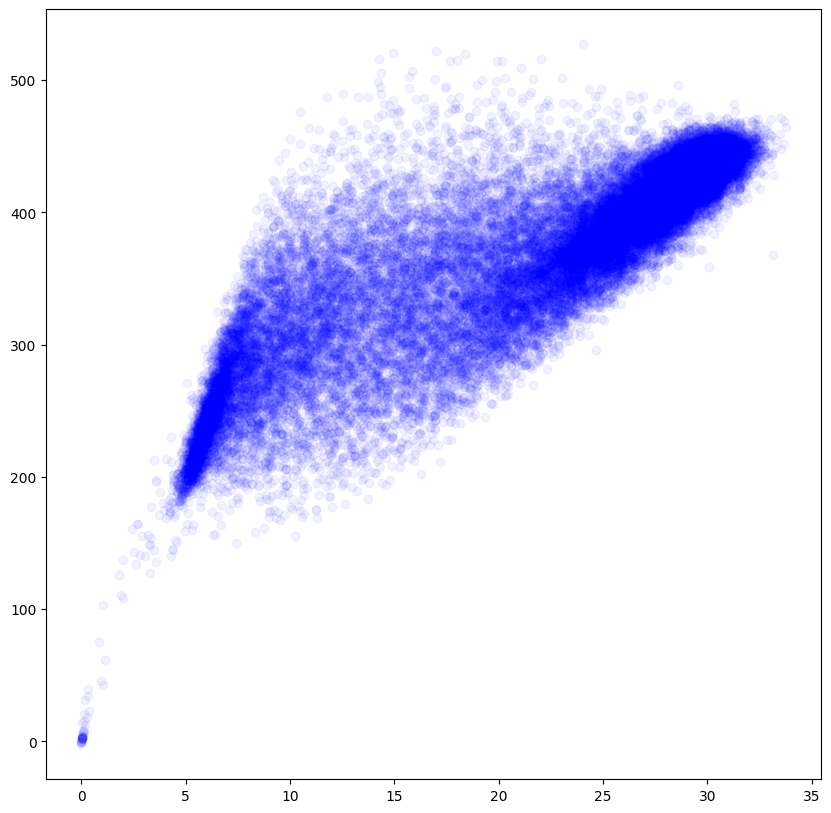

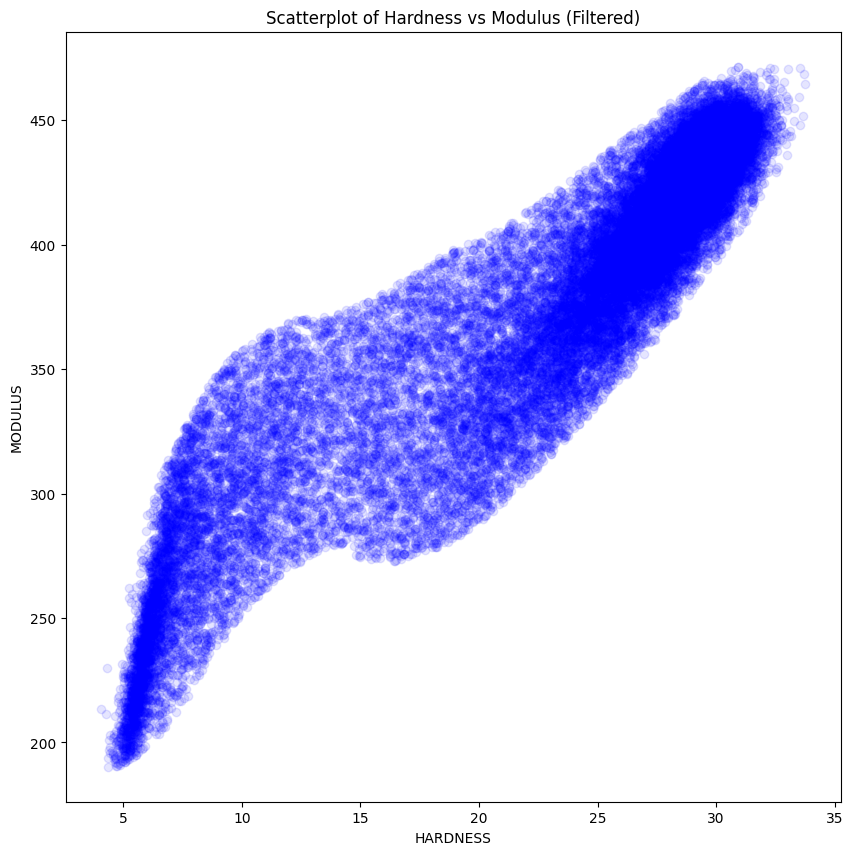

In [6]:
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
import numpy as np
import pandas as pd

excel = '/content/S50-4D-tot.xlsx'

def DataToDF(excel):
    sheet_name = 'Test 1'
    df = pd.read_excel(excel, sheet_name=sheet_name)
    df.dropna(subset=['HARDNESS'], inplace=True)
    #remove inf
    df = df.iloc[2:]
    df = df.astype(float)
    return df

def DFtoMatrix(df):
    # Transform dataframe into a matrix X with dimensions: num of data x 2
    matrix = df[['HARDNESS', 'MODULUS']].values.reshape(-1, 2)
    return matrix

df = DataToDF(excel)

# Plot all the data
plt.figure(figsize=(10, 10))
plt.scatter(df['HARDNESS'], df['MODULUS'], color='blue', alpha=0.05)
plt.show()

# Calculate densities
values = df[['HARDNESS', 'MODULUS']].values.T
kde = gaussian_kde(values)
density = kde(values)

# Stablish density threshold
threshold = np.percentile(density, 10)  # 20% of the data is below this threshold

# Filtrar puntos por densidad
filtered_df = df[density > threshold]
filtered_df.to_excel('filtered_data.xlsx', index=False)

# Nuevo scatterplot con los puntos filtrados
plt.figure(figsize=(10, 10))
plt.scatter(filtered_df['HARDNESS'], filtered_df['MODULUS'], alpha=0.1, color='blue')
plt.xlabel('HARDNESS')
plt.ylabel('MODULUS')
plt.title('Scatterplot of Hardness vs Modulus (Filtered)')
plt.show()

<Figure size 1500x1500 with 0 Axes>

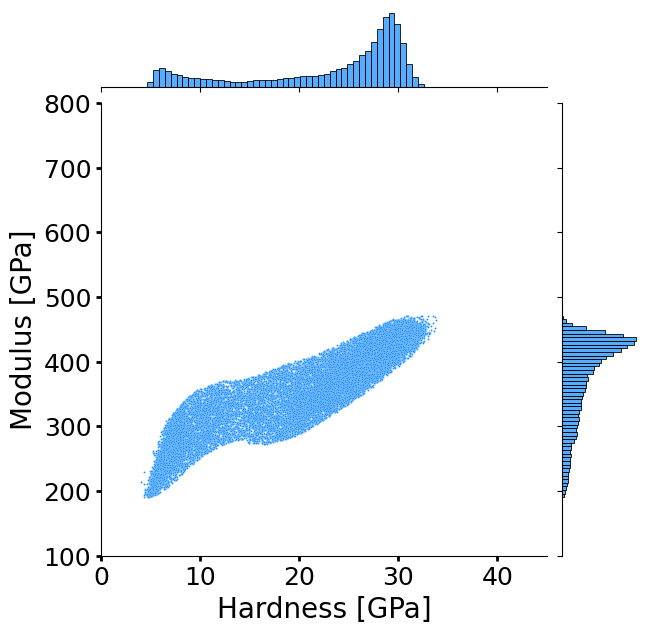

In [7]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


df = pd.read_excel('/content/filtered_data.xlsx', sheet_name='Sheet1')

df = df.astype(float)
H = df['HARDNESS'].values.astype(float)
E = df['MODULUS'].values.astype(float)
# Decide el tamaño de la figura
plt.figure(figsize=(15, 15))  # ajusta según tus necesidades

# Generate the joint plot
g = sns.jointplot(x=H, y=E, kind="scatter", color='dodgerblue', s=2, marginal_kws=dict(bins=50))


# Set limits on the axes
g.ax_joint.set_xlim(0, 45)  # ajusta según tus necesidades
g.ax_joint.set_ylim(100, 800)  # ajusta según tus necesidades

g.ax_joint.set_xlabel('Hardness [GPa]', fontsize=20)
g.ax_joint.set_ylabel('Modulus [GPa]', fontsize=20)
g.ax_joint.tick_params(axis='both', which='major', labelsize=18, width=2)
g.ax_joint.tick_params(axis='both', which='minor', labelsize=16, width=1.5)


# Muestra la figura
plt.show()